In [1]:
import cv2

In [22]:
img = cv2.imread("image2.jpg")

In [23]:
img[0]

array([[ 75,  47,  46],
       [ 75,  47,  46],
       [ 74,  49,  47],
       ...,
       [ 24,  28, 109],
       [ 24,  28, 111],
       [ 24,  28, 111]], dtype=uint8)

This array is the first row of pixels of our image in RGB.

In [24]:
img.shape

(410, 730, 3)

Above result gives us height, width and channel. Channel means RGB values. Height means number of rows and width means number of columns.

In [25]:
img

array([[[ 75,  47,  46],
        [ 75,  47,  46],
        [ 74,  49,  47],
        ...,
        [ 24,  28, 109],
        [ 24,  28, 111],
        [ 24,  28, 111]],

       [[ 75,  47,  46],
        [ 75,  47,  46],
        [ 74,  49,  47],
        ...,
        [ 24,  28, 111],
        [ 24,  28, 111],
        [ 24,  28, 111]],

       [[ 73,  48,  46],
        [ 73,  48,  46],
        [ 74,  49,  47],
        ...,
        [ 24,  27, 112],
        [ 24,  27, 112],
        [ 24,  27, 112]],

       ...,

       [[249, 246, 241],
        [249, 246, 241],
        [249, 246, 241],
        ...,
        [247, 248, 244],
        [247, 248, 244],
        [247, 248, 244]],

       [[249, 246, 241],
        [249, 246, 241],
        [249, 246, 241],
        ...,
        [248, 249, 245],
        [248, 249, 245],
        [248, 249, 245]],

       [[249, 246, 241],
        [249, 246, 241],
        [249, 246, 241],
        ...,
        [248, 249, 245],
        [248, 249, 245],
        [248, 249, 245]]

This results shows us all the pixels of our image in RGB.

## Showing Exact Image

In [26]:
import matplotlib.pyplot as plt

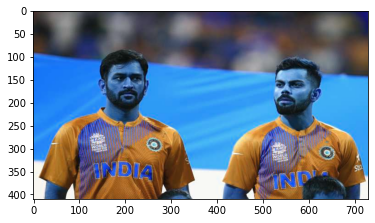

In [27]:
plt.imshow(img)

This will drop some colors from our image

Now Let's move towords something very accurate.

In [56]:
while True:
    cv2.imshow('Result',img)
    # 27 is an ASCII value for escape key
    # waitKey wait for an event from keyboard to perform next work
    #Here we give 2 ms to our OS to switch from one window to another because we have to open another tab to watch our Image.
    #Now it will open the image and when you press escape the image wil be closed
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

# Object Detection
For object detection I'm going to use Viola-Jones object detection framwork. 
For more details: https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework
This algorithm works on Haar Features and files for these haar features are available.
To download haar file:
https://github.com/opencv/opencv/blob/4.x/data/haarcascades/haarcascade_frontalface_default.xml

By using this, we will be able to detect faces from images. 

In [41]:
haar_data = cv2.CascadeClassifier('C:\\Users\\atg24\\anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')


In [42]:
haar_data.detectMultiScale(img)

array([[156, 108, 102, 102],
       [513, 130,  79,  79]])

### Drawing a rectangle around the face.
Rectangle funtion will be used for this purpose and it's syntax is given below:
cv2.rectangle(image,(x,y),(w,h),border color in RGB, Border Thickness)

In [55]:
while True:
    faces_border = haar_data.detectMultiScale(img)
    for x,y,w,h in faces_border:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
    cv2.imshow('Result',img)
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

Above Code will draw a rectangle around the faces.

Now Reading Camera

In [64]:
capture = cv2.VideoCapture(0)
data=[]
while True:
    flag, imag = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(imag)
        for x,y,w,h in faces:
            cv2.rectangle(imag, (x,y), (x+w, y+h), (255,0,255), 4)
            face = imag[y:y+h, x:x+w, :]
            face = cv2.resize(face,(50,50))
            print(len(data))
            if len(data)<200:
                data.append(face)
        cv2.imshow('Result',imag)
        if cv2.waitKey(2) == 27:
            break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [59]:
import numpy as np

In [63]:
np.save('without_mask.npy', data)

In [65]:
np.save('with_mask.npy', data)

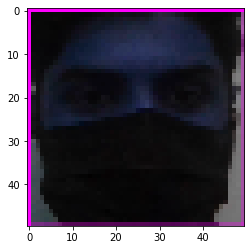

In [66]:
plt.imshow(data[0])

In [67]:
while True:
    cv2.imshow('Result',data[0])
    # 27 is an ASCII value for escape key
    # waitKey wait for an event from keyboard to perform next work
    #Here we give 2 ms to our OS to switch from one window to another because we have to open another tab to watch our Image.
    #Now it will open the image and when you press escape the image wil be closed
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()